In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ast import literal_eval

The main goal is to discover patterns and communicate them clearly, not just to crunch numbers.

**Learning Objectives**  
By the end of this part, you should be able to:  
* Combine and clean multiple real-world datasets from different sources.  
* Conduct exploratory data analysis (EDA) with pandas and visualization libraries.  
* Apply basic statistical modeling to test hypotheses.  
* Communicate insights effectively to a non-technical audience.

1. **Exploratory Analysis**  
Begin by understanding your dataset as a whole. Look for trends, outliers, and relationships.  

    Examples of questions to explore:  
    * How popular is each genre over the last decade?
    * How do budget and revenue vary by year or by genre?  
    * What is the average profit margin (revenue - budget) across genres or years?  
    * How do movie ratings (vote average) relate to box-office performance?  
    * Adjust all financial metrics (budget and revenue) for inflation to 2024 dollars using CPI data.

    Deliverables:  
    * At least 3-4 clearly labeled visualizations (bar charts, scatter plots, or boxplots).  

In [13]:
movies_2015_2024 = pd.read_csv("../data/movies_2015_2024.csv")
movies_2015_2024

,title,vote_average,vote_count,budget,revenue,imdb_id,id,movie_genres,release_year
0,#Alive,7.228,1956,6300000,13416285,tt10620868,614696,"['Action', 'Horror', 'Science Fiction']",2020
1,10 Cloverfield Lane,6.994,8359,15000000,110216998,tt1179933,333371,"['Thriller', 'Science Fiction', 'Drama', 'Horr...",2016
2,12 Strong,6.300,3096,35000000,67450815,tt1413492,429351,"['War', 'Drama', 'Action', 'History']",2018
3,13 Hours: The Secret Soldiers of Benghazi,7.269,3789,50000000,69411370,tt4172430,300671,"['War', 'Action', 'History', 'Drama', 'Thriller']",2016
4,1917,7.986,13092,100000000,446064352,tt8579674,530915,"['War', 'History', 'Drama', 'Action']",2019
...,...,...,...,...,...,...,...,...,...
995,Zombieland: Double Tap,6.912,6022,42000000,122810399,tt1560220,338967,"['Horror', 'Comedy']",2019
996,Zootopia,7.800,17070,150000000,1025521689,tt2948356,269149,"['Animation', 'Adventure', 'Family', 'Comedy']",2016
997,mother!,6.967,6911,30000000,44516999,tt5109784,381283,"['Drama', 'Horror']",2017
998,"tick, tick... BOOM!",7.612,2214,0,0,tt8721424,537116,"['Drama', 'Music']",2021


In [14]:
movies_2015_2024_copy = movies_2015_2024.copy()
movies_2015_2024_copy.head()

,title,vote_average,vote_count,budget,revenue,imdb_id,id,movie_genres,release_year
0,#Alive,7.228,1956,6300000,13416285,tt10620868,614696,"['Action', 'Horror', 'Science Fiction']",2020
1,10 Cloverfield Lane,6.994,8359,15000000,110216998,tt1179933,333371,"['Thriller', 'Science Fiction', 'Drama', 'Horr...",2016
2,12 Strong,6.300,3096,35000000,67450815,tt1413492,429351,"['War', 'Drama', 'Action', 'History']",2018
3,13 Hours: The Secret Soldiers of Benghazi,7.269,3789,50000000,69411370,tt4172430,300671,"['War', 'Action', 'History', 'Drama', 'Thriller']",2016
4,1917,7.986,13092,100000000,446064352,tt8579674,530915,"['War', 'History', 'Drama', 'Action']",2019


In [15]:
movies_2015_2024_copy['movie_genres'] = movies_2015_2024_copy['movie_genres'].apply(literal_eval)
movies_2015_2024_explode = movies_2015_2024_copy.explode('movie_genres')
movies_2015_2024_explode.head()

,title,vote_average,vote_count,budget,revenue,imdb_id,id,movie_genres,release_year
0,#Alive,7.228,1956,6300000,13416285,tt10620868,614696,Action,2020
0,#Alive,7.228,1956,6300000,13416285,tt10620868,614696,Horror,2020
0,#Alive,7.228,1956,6300000,13416285,tt10620868,614696,Science Fiction,2020
1,10 Cloverfield Lane,6.994,8359,15000000,110216998,tt1179933,333371,Thriller,2016
1,10 Cloverfield Lane,6.994,8359,15000000,110216998,tt1179933,333371,Science Fiction,2016


1.How popular is each genre over the last decade?

In [18]:
genre_popularity=movies_2015_2024_explode.groupby(['movie_genres','release_year'])['vote_count'].sum().reset_index()
genre_popularity

,movie_genres,release_year,vote_count
0,Action,2015,306545
1,Action,2016,307167
2,Action,2017,362944
3,Action,2018,315895
4,Action,2019,209965
...,...,...,...
163,Western,2016,10864
164,Western,2017,2425
165,Western,2018,4262
166,Western,2020,1853


<Axes: xlabel='release_year', ylabel='movie_genres'>

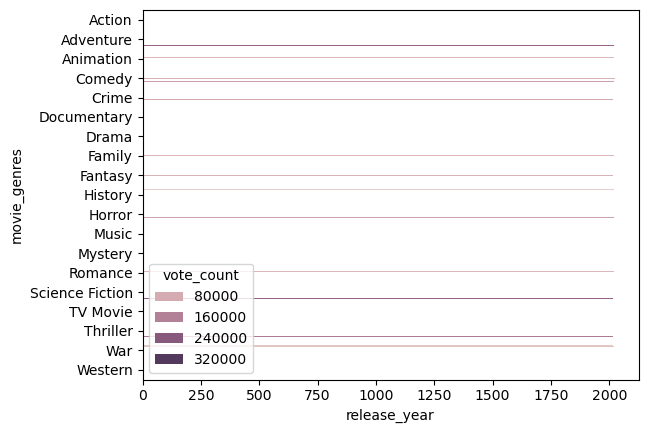

In [25]:
sns.barplot(data =genre_popularity, x='release_year',y='movie_genres', hue = 'vote_count')

In [6]:
genre_popularity['movie_genres'] = genre_popularity['movie_genres'].apply(literal_eval)
genre_popularity.explode('movie_genres')

,movie_genres,release_year,vote_count
0,Action,2019,2332
0,Adventure,2019,2332
0,Animation,2019,2332
0,Comedy,2019,2332
0,Family,2019,2332
...,...,...,...
800,Drama,2015,18785
800,Adventure,2015,18785
801,Western,2015,2413
801,Horror,2015,2413


<Axes: xlabel='release_year', ylabel='budget'>

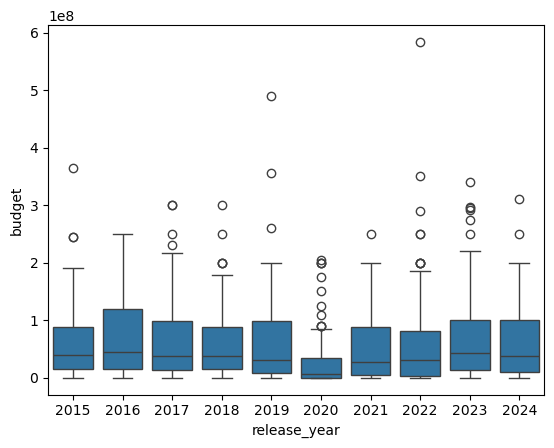

In [7]:
sns.boxplot(data=movies_2015_2024, x='release_year',y = 'budget')

2. How do budget and revenue vary by year or by genre?

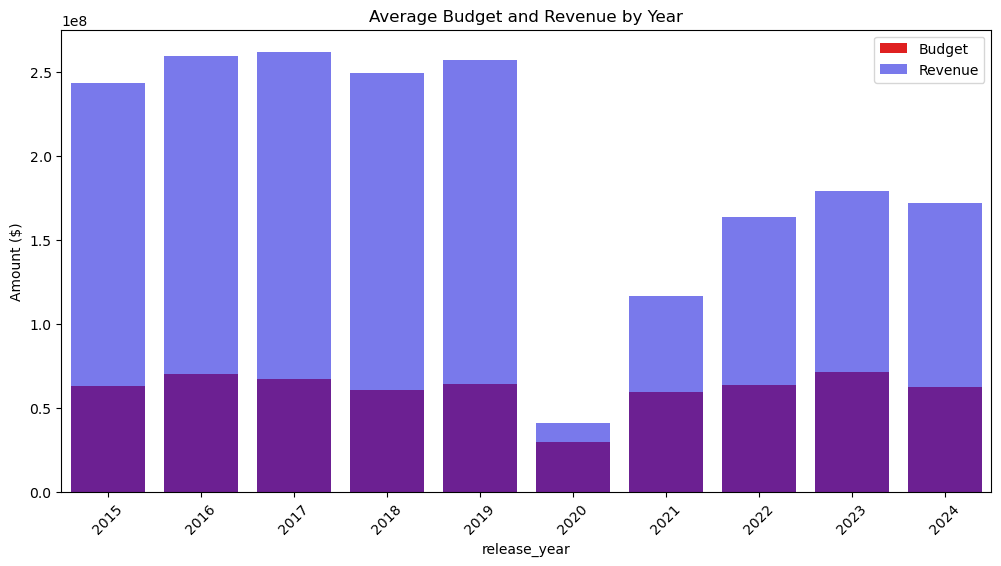

In [8]:
year_summary = movies_2015_2024.groupby('release_year')[['budget','revenue']].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='release_year', y='budget', data=year_summary, color = 'red', label='Budget')
sns.barplot(x='release_year', y='revenue', data=year_summary, color='blue', label='Revenue', alpha=0.6)
plt.title("Average Budget and Revenue by Year")
plt.ylabel("Amount ($)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

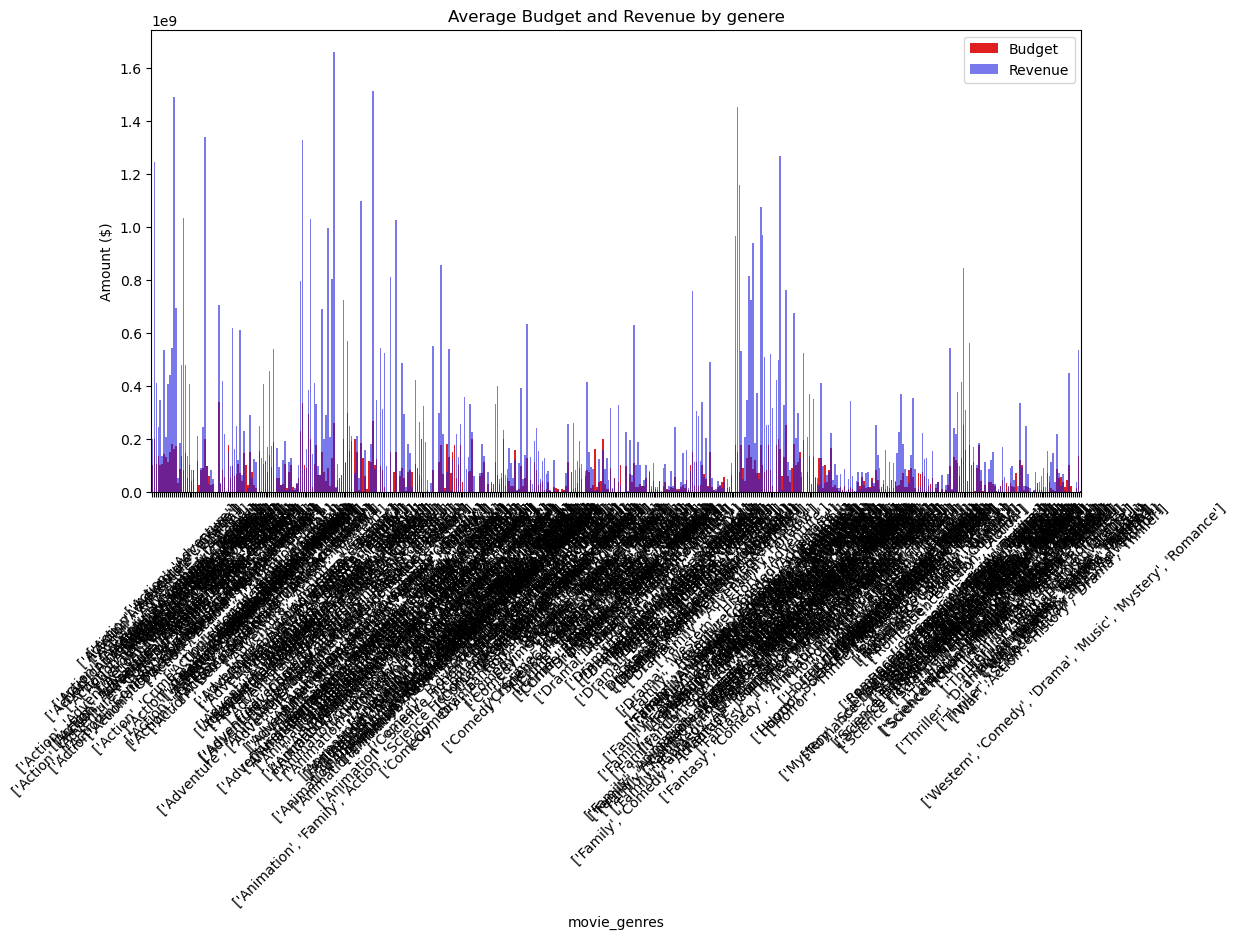

In [9]:
genere_summary = movies_2015_2024.groupby('movie_genres')[['budget','revenue']].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='movie_genres', y='budget', data=genere_summary, color = 'red', label='Budget')
sns.barplot(x='movie_genres', y='revenue', data=genere_summary, color='blue', label='Revenue', alpha=0.6)
plt.title("Average Budget and Revenue by genere")
plt.ylabel("Amount ($)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

3.What is the average profit margin (revenue - budget) across genres or years?

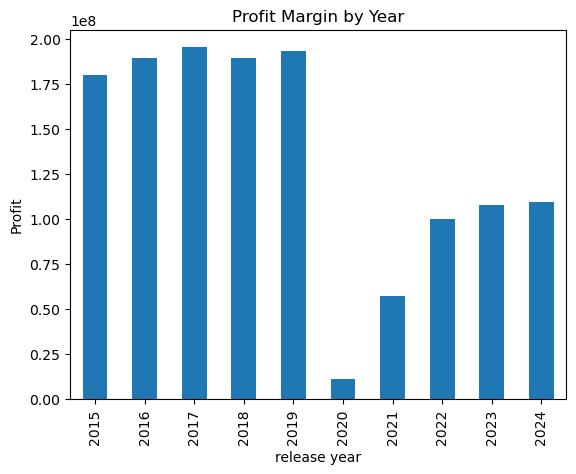

In [10]:
#profit margin = revenue-budget
movies_2015_2024['profit margin'] = movies_2015_2024['revenue']-movies_2015_2024['budget']
movies_2015_2024.head()
movies_2015_2024.groupby('release_year')['profit margin'].mean().plot(kind = 'bar', title = "Profit Margin by Year", xlabel ='release year', ylabel = 'Profit');

4.How do movie ratings (vote average) relate to box-office performance?

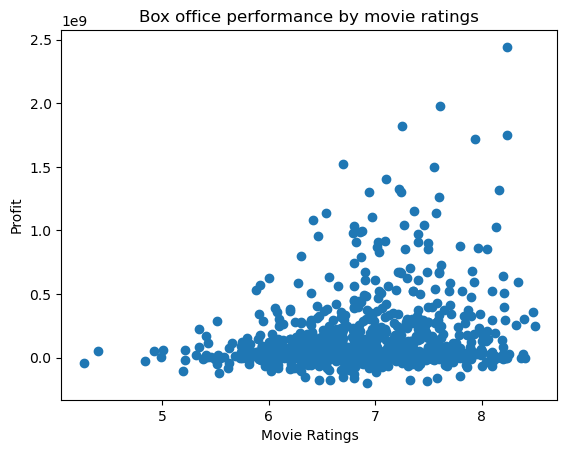

In [11]:
plt.scatter(data = movies_2015_2024, x='vote_average', y = 'profit margin')
plt.title("Box office performance by movie ratings")
plt.xlabel("Movie Ratings")
plt.ylabel("Profit")
plt.show();

5.Adjust all financial metrics (budget and revenue) for inflation to 2024 dollars using CPI data.

2. **Performance Comparisons**  
    Use your merged dataset to examine whether recognition and awards are associated with better performance.  
    Investigate:  
    * Do Best Picture nominees or winners tend to earn higher box-office revenue than non-nominated movies?  
    * Are certain genres or types of roles more common among award-winning films?
    * (If you did the optional scrape) Do movies featuring a Best Actor or Best Actress winner in their cast tend to perform better?  
  
    Deliverables:  
    * At least one regression model 

In [ ]:
# rename columns so keys match
best_picture_rename = best_picture.rename(columns={
    "Year": "release_year",
    "Film": "title"
})

# merge dataframes and keep all movies
merged = movies_2015_2024.merge(
    best_picture_rename[["release_year", "title", "Winner"]],
    on=["release_year", "title"],
    how="left"
)

In [ ]:
# fill in missing entries with no
merged["Winner"] = merged["Winner"].fillna("No")

In [26]:
# generate percent difference in average revenue
(award_winners['revenue'].mean() - non_award_winners['revenue'].mean()) / award_winners['revenue'].mean()

NameError: name 'award_winners' is not defined

> Award winning movies generate **1.2%** more annual revenue than non-award winning movies.

3. **Presentation**  
    Prepare a 10-12 minute presentation of your findings.  
    Your presentation should:  
    * Focus on findings and insights, not code.  
    * Tell a clear story: the questions you asked and what you found.  
    * Include visuals such as charts, summary tables, or model results.
    * Avoid screenshots of code or raw output. Think of your audience as studio executives or film analysts, not programmers.

    Your presentation should be done using PowerPoint/Google Slides or other presentation software.